In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt
import time
from mpl_toolkits import mplot3d

## Task A: Heat conduction in a bar
![](2022-11-04-20-18-41.png)

In [4]:
alpha = 1.172 * 10**-5

a = 0
b = 0.5

dt = 1
dx = 0.01 
# end time
tend = 3600

# boundary conditions (fixed temperature at boundaries)
Ta = 50
#Tb = 50
Tb = 50
# initial condition (initial temperature of the bar)
T0 = 10

In [6]:
#plt.contourf(xmesh,tmesh, ellipse, cmap = 'jet') 
#plt.colorbar() 
#plt.show()

In [7]:
alpha = 1.172 * 10**-5

def HeatConduction(a,b,tend,dt,dx,Ta,Tb,T0):
    x = np.arange(a,b+dx,dx)
    Nx = len(x)
    t = np.arange(0,tend+dt, dt)
    Nt = len(t)
    xmesh, tmesh = np.meshgrid(x,t)
    
    #solution matrix 
    T = np.ndarray((Nt,Nx))
    
    # impose IC
    T[0,:] = T0
    
    c = alpha * dt / dx**2
    
    for p in range(1,Nt):
        #Impose BC
        T[p,0] = Ta 
        T[p,Nx-1] = Tb 
        for i in range(1,Nx-1):
            T[p,i] = c * (T[p-1,i+1]+T[p-1,i-1]) + (1 - 2*c) * T[p-1,i]
            
    plt.plot(x,T[-1,:])
    
    #return(x,t,T)

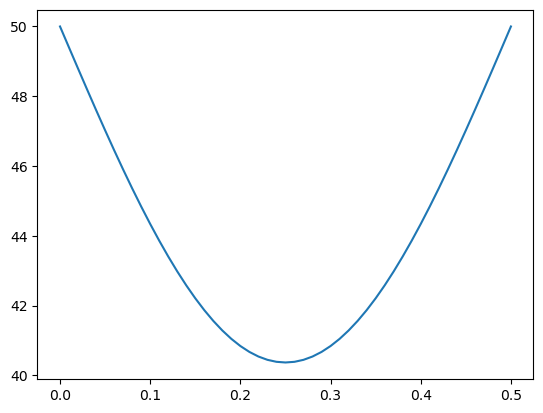

In [8]:
HeatConduction(a,b,tend,dt,dx,Ta,Tb,T0)


## Task B: Heat conduction in a bar with a heat source
![](2022-11-04-20-19-50.png)

In [9]:
def AdvancedHeatConduction(a,b,tend,dt,dx,Ta,Tb,T0):
    x = np.arange(a,b+dx,dx)
    Nx = len(x)
    t = np.arange(0,tend+dt, dt)
    Nt = len(t)
    xmesh, tmesh = np.meshgrid(x,t)
    
    #solution matrix 
    T = np.ndarray((Nt,Nx))
    
    # impose IC
    T[0,:] = T0
    T[0,mt.ceil(Nx/2)] = 100 # set heat source value
    
    c = alpha * dt / dx**2
    
    for p in range(1,Nt):
        # compute at time step p, i.e. t = p * dt
        # do it for every node in the spatial grid
        # start with the boundaries
        T[p,0] = (h*Tw+K/dx*T[p-1,1]) / (h+K/dx)
        T[p,Nx-1] = (h*Tw+K/dx*T[p-1,Nx-2]) / -(h+K/dx)
        
        for i in range(1,Nx-1):
            T[p,i] = c * (T[p-1,i+1]+T[p-1,i-1]) + (1 - 2*c) * T[p-1,i]
        
        # enforce the source at the central node
        T[p,mt.ceil(Nx/2)] = 100
            
    plt.plot(x,T[0,:], color="blue")        
    plt.plot(x,T[500,:], color ="red")
    plt.plot(x,T[-1,:], color="green")
    
    return(x,t,T)

(array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
        0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
        0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 ]),
 array([   0,    1,    2, ..., 1198, 1199, 1200]),
 array([[10.        , 10.        , 10.        , ..., 10.        ,
         10.        , 10.        ],
        [ 9.44444444, 10.        , 10.        , ..., 10.        ,
         10.        , -9.44444444],
        [ 9.44444444,  9.93488889, 10.        , ..., 10.        ,
          7.72111111, -9.44444444],
        ...,
        [17.89363792, 19.51653761, 21.23486753, ...,  5.38444123,
          1.66992607, -2.03939171],
        [17.90358899, 19.52772204, 21.24719543, ...,  5.38619132,
          1.67053521, -2.03993429],
        [17.9135307 , 19.53889593, 21.25951166, ...,  5.38793778,
          1.

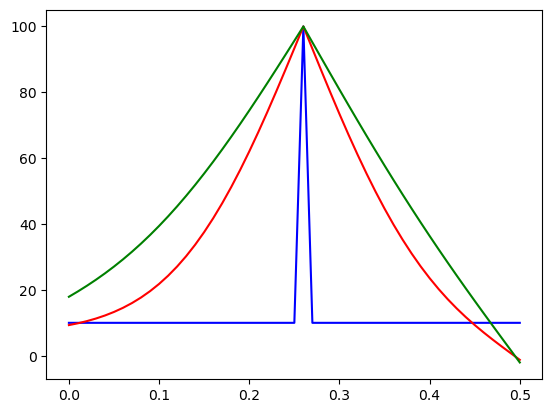

In [10]:
K = 40
h = 500

a = 0
b = 0.5

dt = 1
dx = 0.01 
# end time
tend = 1200

# boundary conditions
Tw = 5
Ta = -h*Tw
Tb = h*Tw
# initial condition (initial temperature of the bar)
T0 = 10
# bc constants

AdvancedHeatConduction(a,b,tend,dt,dx,Ta,Tb,T0)

## Task C: Stability of the finite difference numerical method
![](2022-11-04-20-20-19.png)

True

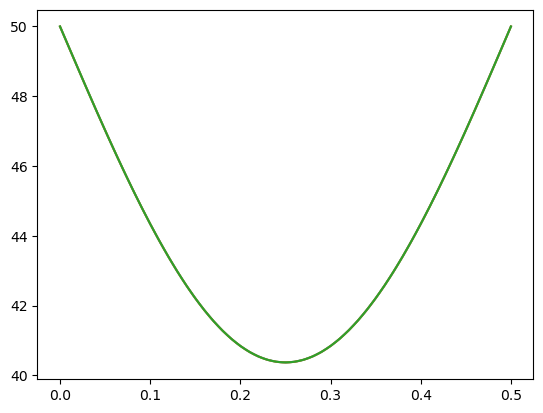

In [11]:
def courant(a,dt,dx):
    return(a*dt/dx**2 < 1/2)

alpha = 1.172 * 10**-5

a = 0
b = 0.5

dt = 1
dx = 0.01 
# end time
tend = 3600

# boundary conditions (fixed temperature at boundaries)
Ta = 50
Tb = 50
# initial condition (initial temperature of the bar)
T0 = 10


dx = 0.01
HeatConduction(a,b,tend,dt,dx,Ta,Tb,T0)
courant(alpha,dt,dx)

dx = 0.005
HeatConduction(a,b,tend,dt,dx,Ta,Tb,T0)
courant(alpha,dt,dx)

# dx = 0.001
# HeatConduction(a,b,tend,dt,dx,Ta,Tb,T0)
# courant(alpha,dt,dx)
# too divergent, overflow


dx = 0.001
dt = 0.04
HeatConduction(a,b,tend,dt,dx,Ta,Tb,T0)
courant(alpha,dt,dx)


## Task D: From ODE to PDE: baking a freaking potato in the oven
![](2022-11-04-20-20-44.png)


True
81.48352568623737


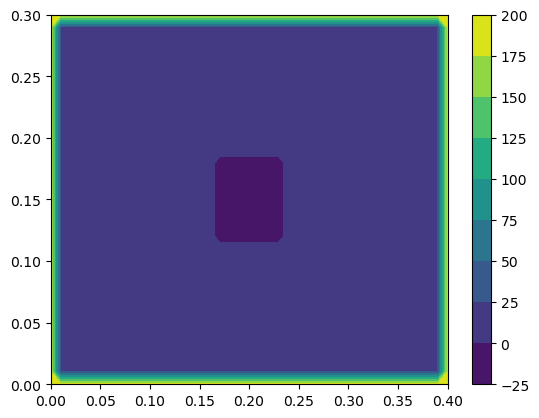

In [12]:
#boundaries
xa = 0
xb = 0.4
ya = 0
yb = 0.3
tb = 9000

#potato size 
pw = 0.06

#steps
dx = 0.01
dy = 0.01
dt = 1


# set the physics
Toven = 25 # initial Temperature of oven
Tpot = -15 # initial Temperature of potato
Tw = 180 # T of oven walls

alphaAir = 1.9e-5 # thermal diffusivity of air
alphapot = 1.3e-7 # thermal diffusivity of potato


#check for stability
stability = dt < (dx**2) * (dy**2) / (2*alphaAir*((dx**2) + (dy**2)))
print(stability)
# ================================================


#position of potato
xap = 0.17
xbp = 0.23
yap = 0.12
ybp = 0.18



# greate the spatial grid points
x = np.arange(xa,xb+dx,dx)
Nx = len(x)
y = np.arange(ya,yb+dy,dy)
Ny = len(y)
# create the temporal grid points
t = np.arange(0,tb+dt,dt)
Nt = len(t)

# create the solution matrix
T = np.ndarray((Nt,Nx,Ny))

# Defining a matix alpha of thermal diffusivity
alpha = np.ndarray((Nx,Ny))
alpha[:,:] = alphaAir


# set initial Oven temperature
T[0,:,:] = Toven

# initialise the tempearture of the potato
for i in range(0,Nx):
    for j in range(0,Ny):
        if (xap<=x[i]<=xbp) and (yap<=y[j]<=ybp):
            T[0,i,j] = Tpot
            alpha[i,j] = alphapot


            
            
    

#Determine constants
cx = alpha * dt / dx**2
cy = alpha * dt / dy**2


for p in range(1,Nt):
#   compute at every timestep
# set boundaries for all timesteps
    T[p,0,:], T[p,Nx-1,:], T[p,:,0], T[p,:,Ny-1] = Tw, Tw, Tw, Tw 
    #compute interior nodes
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            T[p,i,j] = cx[i,j]*(T[p-1,i+1,j]+T[p-1,i-1,j]) + \
                       cy[i,j]*(T[p-1,i,j+1]+T[p-1,i,j-1]) + \
                       (1 - 2*cx[i,j] - 2*cy[i,j]) * T[p-1,i,j]

print(np.min(T[-1,:,:])) # lowest temperature in the last timestep


#plot surface
(Yg, Xg) = np.meshgrid(y,x)
plt.contourf(Xg,Yg,T[1,:,:]) #x,y + values to fill in
plt.colorbar()


1


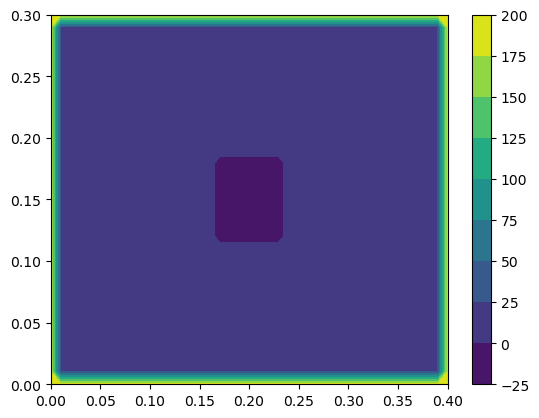

1001


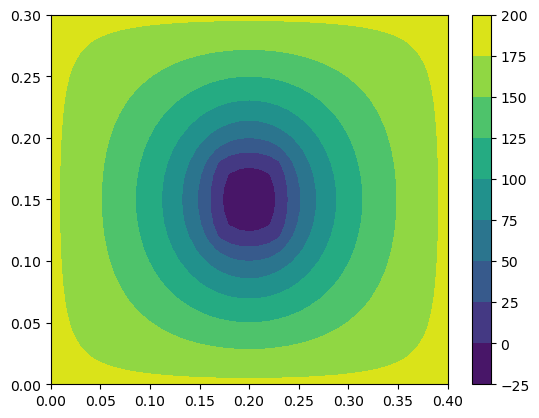

2001


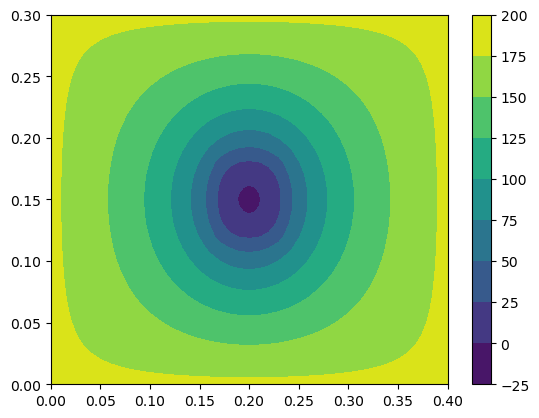

3001


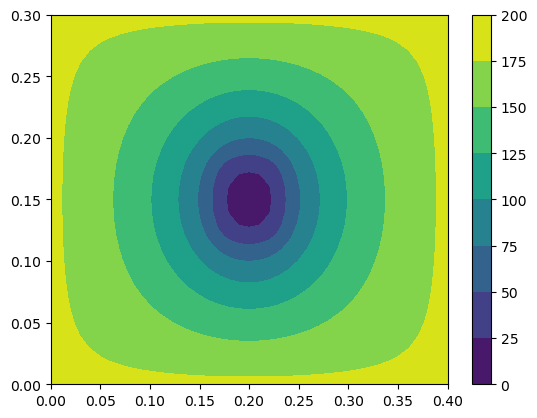

4001


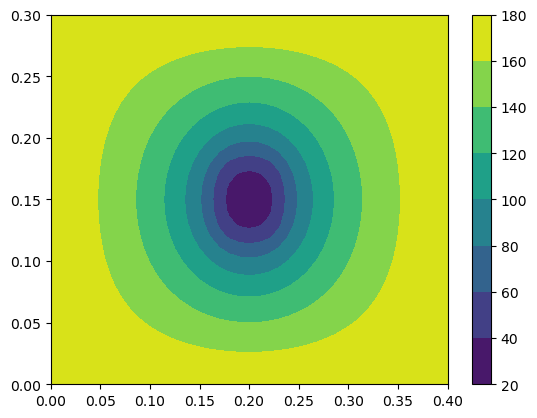

5001


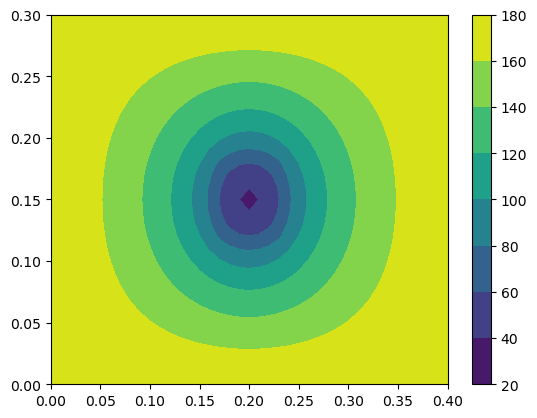

6001


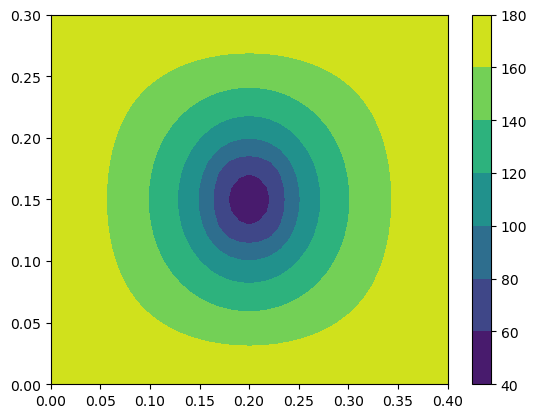

7001


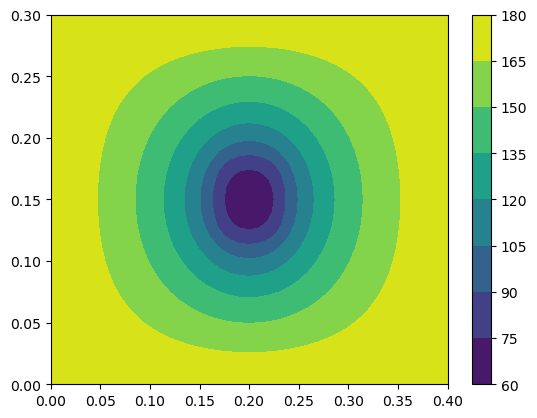

8001


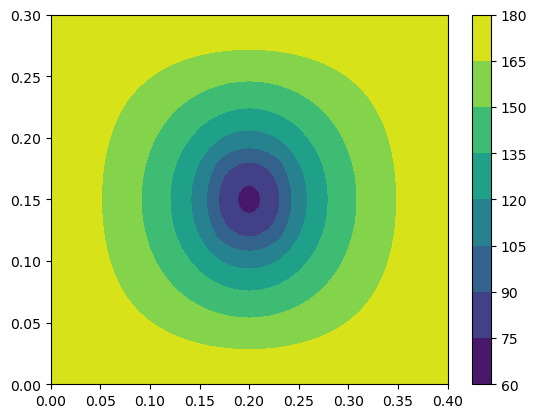

In [13]:
for i in range(1,Nt,1000):
    print(i)
    plt.contourf(Xg,Yg,T[i,:,:])
    plt.colorbar()
    plt.show()